In [2]:
!pip install opencv-python

In [6]:
!pip install keras

In [115]:
!pip uninstall tensorflow-gpu==1.13.1 -y
!pip install tensorflow-gpu

Uninstalling tensorflow-gpu-1.13.1:
  Successfully uninstalled tensorflow-gpu-1.13.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\tensorflow_core\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.



In [116]:
#!pip uninstall tensorflow-gpu -y
#!pip install tensorflow-gpu==1.13.1

In [100]:
import numpy as np
import pickle
import cv2
import os
from os import listdir
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [104]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.optimizers import Adam

In [12]:
default_image_size = tuple((348, 348))
## Function to convert image to array of 348 X 348
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [24]:
e_lables = pd.read_csv("GroceryStoreDataset-master/dataset/classes.csv")

In [25]:
e_lables.columns

Index(['Class', 'Class_ID', 'Coarse_class'], dtype='object')

In [117]:
image_list_a, label_list = [], []

totalImage = 0  # it is used to control total numbe of images for each class

root_dir = listdir("GroceryStoreDataset-master/dataset/test") # Specify location of plant images

for image_folder in root_dir :  # Look for each folder
    # Look for All images in each folder
    
    
    image_list = listdir(f"GroceryStoreDataset-master/dataset/test/{image_folder}")
    
    for image in image_list:
               
        image_sub_cat = listdir(f"GroceryStoreDataset-master/dataset/test/{image_folder}/{image}")
    
        for image_sub_cat_name in image_sub_cat:
        
            #print(image_sub_cat_name)
            path  = f"GroceryStoreDataset-master/dataset/test/{image_folder}/{image}/{image_sub_cat_name}"
            
            
            if os.path.isdir(path):  
                image_sub_cat_name_jpg = listdir(f"GroceryStoreDataset-master/dataset/test/{image_folder}/{image}/{image_sub_cat_name}")
                
                for image_name in image_sub_cat_name_jpg:
                    #print(image_sub_cat_name)
                    label_list.append(e_lables[e_lables.Class == image_sub_cat_name ].Class_ID)
                    if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
                        image_full_path = f"GroceryStoreDataset-master/dataset/test/{image_folder}/{image}/{image_sub_cat_name}/{image_name}"
                        image_list_a.append(convert_image_to_array(image_full_path))
                    
            if os.path.isfile(path):
                #print(image_sub_cat_name)
                label_list.append(e_lables[e_lables.Class == image_sub_cat_name ].Class_ID)
                if image_sub_cat_name.endswith(".jpg") == True or image_sub_cat_name.endswith(".JPG") == True:
                        image_full_path = f"GroceryStoreDataset-master/dataset/test/{image_folder}/{image}/{image_sub_cat_name}"
                        image_list_a.append(convert_image_to_array(image_full_path))
                
            
            #image_sub_cat_name_jpg = listdir(f"GroceryStoreDataset-master/dataset/test/{image_folder}/{image}/{image_sub_cat_name}")
            #for image_name in image_sub_cat_name_jpg:
            #    print(image_name)
            
            
        '''
        image_name = f"PlantVillage/{image_folder}/"+image
        if isinstance(image_name, str) == True:
            if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
                image_list_a.append(convert_image_to_array(image_name))
                label_list.append(image_folder)
        totalImage = totalImage+1
        if(totalImage>=20):          
            break
       '''     
#print(len(label_list),len(np.unique(np.asarray(label_list))))
image_list_a = np.asarray(image_list_a)
label_list = np.asarray(label_list)

In [40]:
print(label_list.shape, image_list_a.shape)

(2485,) (2485, 348, 348, 3)


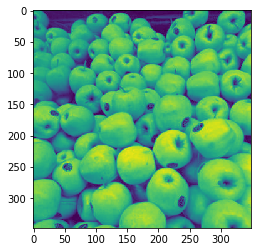

In [92]:
plt.imshow(image_list_a[0][: ,: ,1])


In [98]:
image_list_a[0][: ,: ,2].shape

(348, 348)

In [102]:
# Split data in train and test
image_list_a = np.asarray(image_list_a)
x_train, x_test, y_train, y_test = train_test_split(image_list_a, label_list, test_size=0.2, random_state = 42)

In [113]:
EPOCHS = 10
INIT_LR = 0.001
BS = 32
width=348
height=348
depth=3
inputShape = (height, width, depth)
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]) 
chanDim = 1
n_classes = 81

# Develope  model
model = Sequential()
model.add(Conv2D(4, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(524))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
model.summary()

AttributeError: module 'tensorflow_core._api.v2.config' has no attribute 'experimental_list_devices'